# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# A primeira etapa de qualquer trabalho com análise de dados
# é "subir" o arquivo e depois prepará-lo, que pode se dar na
# forma de verificação de termos duplicados e dados ausentes.
# Caso estejam presentes, faz-se necessários que sejam limpos
# do dataset, para que não interfiram negativamente na análise.

df = pd.read_csv("/content/SINASC_RO_2019 V2.csv")

df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [ ]:
df.isna().sum()

ORIGEM          0
CODESTAB      115
CODMUNNASC      0
LOCNASC         0
IDADEMAE        0
             ... 
munResUf        0
munResLat       1
munResLon       1
munResAlt       1
munResArea      1
Length: 69, dtype: int64

In [ ]:
df.shape

(27028, 69)

In [ ]:
df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [ ]:
# Acho que as principais variáveis de apreciação para a realização
# da presente tarefa são: APGAR5, sexo, tempo de gestação. Desse modo,
# irei do dataset selecionar apenas as colunas que sejam pertinentes.
# APGAR5, por sua vez, refere-se à asfixia.

df_sus = df[["APGAR5", "SEXO", "GESTACAO"]]
df_sus.head()

,APGAR5,SEXO,GESTACAO
0,10.0,Masculino,37 a 41 semanas
1,9.0,Feminino,37 a 41 semanas
2,10.0,Feminino,37 a 41 semanas
3,10.0,Feminino,37 a 41 semanas
4,10.0,Feminino,37 a 41 semanas


In [ ]:
df_sus.isna().sum()

APGAR5       103
SEXO           4
GESTACAO    1232
dtype: int64

In [ ]:
df_sus.shape

(27028, 3)

In [ ]:
df_sus = df_sus.dropna()

In [ ]:
df_sus.shape

(25705, 3)

In [ ]:
df_sus.head()

,APGAR5,SEXO,GESTACAO
0,10.0,Masculino,37 a 41 semanas
1,9.0,Feminino,37 a 41 semanas
2,10.0,Feminino,37 a 41 semanas
3,10.0,Feminino,37 a 41 semanas
4,10.0,Feminino,37 a 41 semanas


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [ ]:
# Criando uma coluna que irá categorizar a variável APGAR5,
# será portanto uma variável categórica.

df_sus.loc[(df_sus["APGAR5"] >= 0) & (df_sus["APGAR5"] <= 3), "NIVEL_APGAR5"] = "asfixia grave"
df_sus.loc[(df_sus["APGAR5"] >= 4) & (df_sus["APGAR5"] <= 5), "NIVEL_APGAR5"] = "asfixia moderada"
df_sus.loc[(df_sus["APGAR5"] >= 6) & (df_sus["APGAR5"] <= 7), "NIVEL_APGAR5"] = "asfixia leve"
df_sus.loc[(df_sus["APGAR5"] >= 8) & (df_sus["APGAR5"] <= 10), "NIVEL_APGAR5"] = "normal"


In [ ]:
df_sus.head()

,APGAR5,SEXO,GESTACAO,NIVEL_APGAR5
0,10.0,Masculino,37 a 41 semanas,normal
1,9.0,Feminino,37 a 41 semanas,normal
2,10.0,Feminino,37 a 41 semanas,normal
3,10.0,Feminino,37 a 41 semanas,normal
4,10.0,Feminino,37 a 41 semanas,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<Axes: xlabel='GESTACAO', ylabel='APGAR5'>

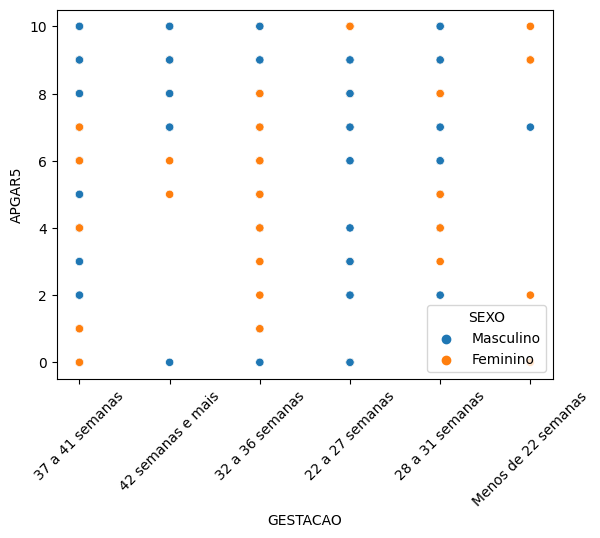

In [ ]:
# Vejamos, há três principais formas que eu posso, imagino, fazer essa comparação.
# Tentarei cada uma das que eu imagino serem eficientes.

# Scatterplot:

# Ajuste as legendas do eixo x
plt.xticks(rotation=45)

sns.scatterplot(x="GESTACAO", y="APGAR5", data=df_sus, hue="SEXO")

# Explicando o gráfico abaixo:

# Segundo o instrutor o scatterplot   o gráfico de dispersão não é feito para
# receber variáveis categóricas como é o caso de "GESTACAO" que só acaba por entregar
# seis posições para alocar os pontos, os gráficos de dispersão são utilizados para
# determinar a força de um relacionamento entre duas variáveis numéricas, salvo exceções.
# É justamente por isso que ele fica esteticamente desse modo, diferente do que
# posso encontrar nos gráficos elaborados na seção das anotações da aula sobre
# Análise Descritiva I.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '37 a 41 semanas'),
  Text(1, 0, '42 semanas e mais'),
  Text(2, 0, '32 a 36 semanas'),
  Text(3, 0, '22 a 27 semanas'),
  Text(4, 0, '28 a 31 semanas'),
  Text(5, 0, 'Menos de 22 semanas')])

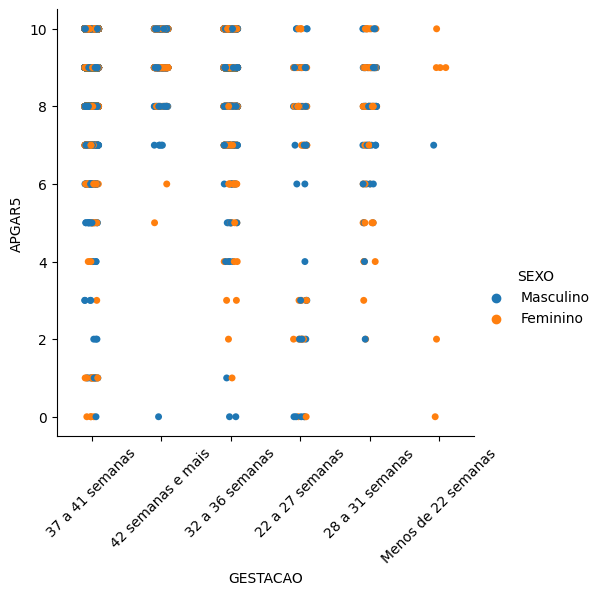

In [ ]:
# Catplot:

# Eu tentei criar gráficos de barras por meio dessa função,
# mas por alguma razão não funcionou como eu esperava, por quê?
# (tutor, por favor responder a essa pergunta)

sns.catplot(data=df_sus,
            x="GESTACAO",
            y="APGAR5",
            hue="SEXO")

# Ajuste as legendas do eixo x
plt.xticks(rotation=45)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '37 a 41 semanas'),
  Text(1, 0, '42 semanas e mais'),
  Text(2, 0, '32 a 36 semanas'),
  Text(3, 0, '22 a 27 semanas'),
  Text(4, 0, '28 a 31 semanas'),
  Text(5, 0, 'Menos de 22 semanas')])

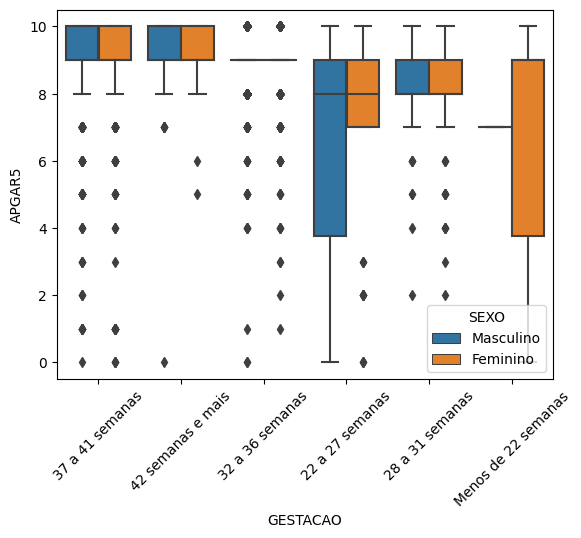

In [ ]:
# Boxplot:

sns.boxplot(x="GESTACAO", y="APGAR5", hue="SEXO", data=df_sus)
# Ajuste as legendas do eixo x
plt.xticks(rotation=45)



####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [ ]:
# Montando a tabela cruzada por meio da função crosstab().

# A variável que ocupa a posição das linhas nesse dataframe é
# o primeiro termo que entra como parâmetro, sendo o segundo
# relativo à posição das colunas.

df_sus_frequency = pd.crosstab(df_sus["GESTACAO"], df_sus["APGAR5"])
df_sus_frequency.head()

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,1,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,44,151,1417,13564,7283
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [ ]:
# Para que eu conseguisse relizar o cálculo da frequência dos dados, isto é,
# a proporção de cada qual com base no todo, eu criei uma outra coluna, que
# mensura o total de APGAR5 relativo a cada período de gestação.

# Para tanto, além de criar a coluna, bastei dizer de qual conjunto de dados
# gostaria de realizar a soma - sum() -, passando como parâmetro o eixo 1,
# o qual se refere às linhas.

df_sus_frequency["TOTAL_APGR5"] = df_sus_frequency.sum(axis=1)

df_sus_frequency

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,TOTAL_APGR5
GESTACAO,,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8,85
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13,162
32 a 36 semanas,2,2,1,2,8,11,17,56,362,1307,465,2233
37 a 41 semanas,5,20,3,5,7,21,44,151,1417,13564,7283,22520
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223,698
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1,7


In [ ]:
# Calculando a proporção de fato, basicamente eu utilizei a função div - de divisão -
# para aferir a porcentagem do quanto de um nível de asfixia fazia parte de um período
# de gestação.

# Na função div, o primeiro termo é o denominador, enquanto que o segundo, sendo axis=0,
# é o numerador. Como segundo termo passei o axis=0, porque quero que ele faça esse cálculo
# para cada item do dataframe.

# Eu envolvi essa função dentro de outra, o round, porque preferi arredondar por 2
# os resultados encontradados depois de ter se realizado a divisão.

df_sus_frequency_pct = round(df_sus_frequency.div(df_sus_frequency['TOTAL_APGR5'], axis=0), 2)
df_sus_frequency_pct

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,TOTAL_APGR5
GESTACAO,,,,,,,,,,,,
22 a 27 semanas,0.08,0.0,0.09,0.07,0.01,0.00,0.02,0.12,0.28,0.22,0.09,1.0
28 a 31 semanas,0.00,0.0,0.01,0.01,0.03,0.04,0.04,0.07,0.38,0.34,0.08,1.0
32 a 36 semanas,0.00,0.0,0.00,0.00,0.00,0.00,0.01,0.03,0.16,0.59,0.21,1.0
37 a 41 semanas,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.01,0.06,0.60,0.32,1.0
42 semanas e mais,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.01,0.06,0.61,0.32,1.0
Menos de 22 semanas,0.14,0.0,0.14,0.00,0.00,0.00,0.00,0.14,0.00,0.43,0.14,1.0


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

In [ ]:
# Selecionando o intervalo de períodos de gestação que vão até de 32 a 36
# semanas para fazer a análise:

df_selecionado = df_sus_frequency_pct.loc[:'32 a 36 semanas']
df_selecionado

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,TOTAL_APGR5
GESTACAO,,,,,,,,,,,,
22 a 27 semanas,0.08,0.0,0.09,0.07,0.01,0.00,0.02,0.12,0.28,0.22,0.09,1.0
28 a 31 semanas,0.00,0.0,0.01,0.01,0.03,0.04,0.04,0.07,0.38,0.34,0.08,1.0
32 a 36 semanas,0.00,0.0,0.00,0.00,0.00,0.00,0.01,0.03,0.16,0.59,0.21,1.0


<Axes: xlabel='GESTACAO'>

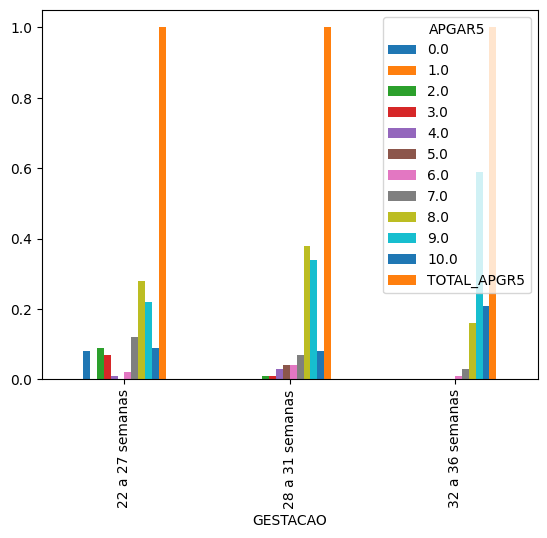

In [ ]:
df_selecionado.plot.bar()

**Resposta:**

Para responder a essa questão eu tennho que partir de uma concepção de que nascidos prematuros não apresentam um sistema respiratório desenvolvido que lhes permitam respirar de forma autonôma, precisando portanto de ajuda de aparelhos, pois de outro modo entrariam a um cenário de asfixia.

Da mesma forma, tanto a partir dos valores expostos no dataframe quanto pela análise gráfica, verifica-se a presença de bebês que apresentam algum grau de asfixia até o período de 32 a 36 semanas, sendo esse maior à medida que o bebê nasce em períodos mais curtos, como se pode observar no período de 22 a 27 semanas no qual os valores de asfixia são maiores em comparação com os dois períodos posteriores.

Tal aspecto permite conceber que, sim, os bebês que nascem antes do período de 37 semanas podem ser classificados como prematuros, porque, ainda que não todos, apresentam graus de algum nível de asfixia.  

In [ ]:
# Resposta: Para ser honesto, eu não sei como responder a questão, uma vez que,
# penso, eu precisaria saber se os bebês são prematuros ou não, para que assim
# eu pudesse contar a proporção de prematuros e de não prematuros em relação aos
# respectivos períodos. Por outro lado, posso, imagino, pensar que nascidos prematuros
# ainda não apresentam um sistema respiratório desenvolvido que lhes permitam respirar
# de forma autonôma, precisando de ajuda de aparelhos, pois, de outro modo, entrariam
# num cenário de asfixia.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [ ]:
df_sus_2 = df[["APGAR5", "PESO"]]

df_sus_2.head()

,APGAR5,PESO
0,10.0,3685
1,9.0,3055
2,10.0,3460
3,10.0,2982
4,10.0,3310


In [ ]:
df_sus_2.isna().sum()

APGAR5    103
PESO        0
dtype: int64

In [ ]:
df_sus_2 = df_sus_2.dropna()

In [ ]:
df_sus_2.isna().sum()

APGAR5    0
PESO      0
dtype: int64

In [ ]:
df_sus_2.head()

,APGAR5,PESO
0,10.0,3685
1,9.0,3055
2,10.0,3460
3,10.0,2982
4,10.0,3310


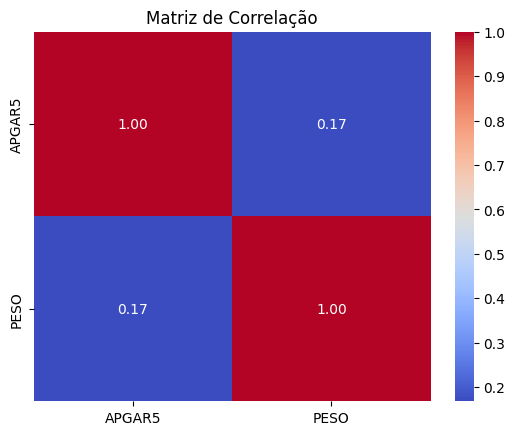

In [ ]:
# Para verificar o nível de correlação, irei criar a matriz de correlação.
# Para tanto:

# Calculando a matriz de correlação:
correlation_matrix = df_sus_2.corr()

# Criando o gráfico de matriz de correlação:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()